#Besoin _client 3

In [337]:
import pandas as pd
import numpy as np

In [338]:
# Lire les données
df = pd.read_csv('./Data_Arbre.csv')
df['fk_arb_etat'].unique()

array(['EN PLACE', 'REMPLACÉ', 'Essouché', 'SUPPRIMÉ', 'ABATTU',
       'Non essouché'], dtype=object)

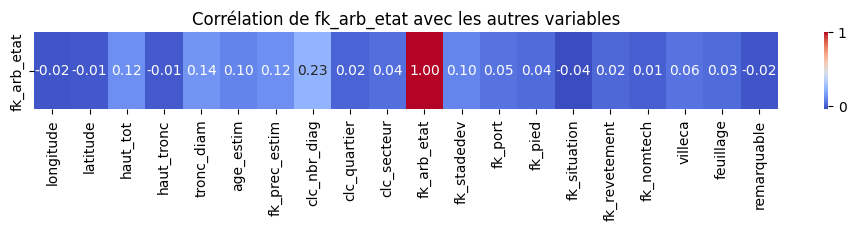

In [339]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Sélectionner les variables quantitatives
quantitative_vars = df.select_dtypes(include=['float64', 'int64'])

# Sélectionner et encoder les variables qualitatives
qualitative_vars = df.select_dtypes(include=['object', 'category']).apply(LabelEncoder().fit_transform)

# Combiner les variables quantitatives et qualitatives encodées
combined_vars = pd.concat([quantitative_vars, qualitative_vars], axis=1)

# Calculer la matrice de corrélation
correlation_matrix = combined_vars.corr()

# Afficher uniquement la ligne de 'fk_arb_etat'
plt.figure(figsize=(12, 1))
sns.heatmap(correlation_matrix.loc[['fk_arb_etat']], annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Corrélation de fk_arb_etat avec les autres variables')
plt.show()

tout au dessus 0.1

In [ ]:
# Fonction pour filtrer les variables avec corrélation
def filter_highly_correlated(corr_matrix, target_var, threshold):
    # Sélectionner les variables avec une corrélation absolue supérieure au seuil
    high_corr_vars = corr_matrix[target_var][abs(corr_matrix[target_var]) > threshold].index
    return high_corr_vars

In [340]:
# Sélectionner les colonnes pertinentes
high_corr_vars = filter_highly_correlated(correlation_matrix, 'fk_arb_etat', 0.09) # 0.09 pour prendre en compte les erreurs d'arrondi dans l'affichage de la matrice
print(high_corr_vars)

data = df[high_corr_vars].copy()
print(data.head())

   haut_tot  tronc_diam  age_estim fk_stadedev  fk_prec_estim  clc_nbr_diag  \
0       6.0        37.0       15.0       Jeune            5.0           0.0   
1      13.0       160.0       50.0      Adulte           10.0           0.0   
2      12.0       116.0       30.0      Adulte           10.0           0.0   
3      16.0       150.0       50.0      Adulte            2.0           0.0   
4       5.0       170.0       40.0      Adulte            2.0           0.0   

  fk_arb_etat  
0    EN PLACE  
1    EN PLACE  
2    REMPLACÉ  
3    EN PLACE  
4    Essouché  


In [341]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Encodage des colonnes catégorielles
label_encoders = {}
for column in ['fk_prec_estim', 'fk_stadedev', 'fk_arb_etat']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data.drop('fk_arb_etat', axis=1)
y = data['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [342]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#Entrainer le modèle de classification

# Initialiser et entraîner le modèle
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9041835357624831


In [343]:
import joblib
#Charger le modèle

# Enregistrer le modèle
joblib.dump(model, 'random_forest_model.pkl')

# Enregistrer le scaler
joblib.dump(scaler, 'scaler.pkl')

# Enregistrer les label encoders
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

# Même chose avec  pour régression, mais tout ça uniquement sur ton fichier ou tu as mis que fk_arbre_etat = essouché ou non essouché.

In [344]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Filtrer les données pour inclure seulement 'essouché' ou 'non essouché'
filtered_df = df[df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])].copy()

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_df.to_csv('./Filtered_Data_Arbre.csv', index=False)
print("Le fichier CSV filtré a été créé avec succès.")

# Lire les données filtrées
df2 = pd.read_csv('./Filtered_Data_Arbre.csv')

# Sélectionner les colonnes pertinentes
data2 = df2[high_corr_vars].copy()

Le fichier CSV filtré a été créé avec succès.


In [345]:
# Encodage des colonnes catégorielles
categorical_columns = ['fk_prec_estim', 'fk_stadedev']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le

# Encodage de la colonne cible 'fk_arb_etat'
le_arb_etat = LabelEncoder()
data2['fk_arb_etat'] = le_arb_etat.fit_transform(data2['fk_arb_etat'])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data2.drop('fk_arb_etat', axis=1)
y = data2['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [346]:
# Initialiser et entraîner le modèle
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred = model.predict(X_test)



mse_random_forest = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_random_forest}')

# Mean Absolute Error
mae_random_forest = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae_random_forest}')

# R^2 Score
r2_random_forest = r2_score(y_test, y_pred)
print(f'R² Score: {r2_random_forest}')

Mean Squared Error: 0.12814615384615388
Mean Absolute Error: 0.2012820512820513
R² Score: -0.14653117647058833


In [347]:
# Enregistrer le modèle et les transformateurs
joblib.dump(model, 'random_forest_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_arb_etat, 'label_encoder_fk_arb_etat.pkl')

# Enregistrer les label encoders pour les colonnes catégorielles
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

print("Modèle et transformateurs enregistrés avec succès.")

# Ajouter la colonne "déraciner" à un nouveau fichier CSV si celui-ci n'existe pas déjà
output_file = './Data_Arbre_Modified.csv'
if os.path.exists(output_file):
    print(f"Le fichier {output_file} existe déjà. Aucune action n'a été effectuée.")
else:
    # Lire les données
    newDataArbre = pd.read_csv('./Data_Arbre.csv')
    # Ajouter la colonne "déraciner" initialisée à 0
    newDataArbre['déraciner'] = 0

    # Enregistrer les données modifiées dans un nouveau fichier CSV
    newDataArbre.to_csv(output_file, index=False)
    print("Le fichier CSV modifié a été créé avec succès.")

Modèle et transformateurs enregistrés avec succès.
Le fichier ./Data_Arbre_Modified.csv existe déjà. Aucune action n'a été effectuée.


In [348]:
# Charger le modèle et les transformateurs
loaded_model = joblib.load('random_forest_regressor.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)


# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

[0.06 0.11 0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.07 0.68 0.   0.   0.   0.   0.02
 0.02 0.   0.   0.02 0.13 0.   0.   0.   0.   0.   0.   0.   0.   0.11
 0.   0.05 0.05 0.   0.06 0.01 0.6  0.05 0.18 0.   0.06 0.05 0.17 0.01
 0.03 0.1  0.01 0.01 0.   0.   0.17 0.08 0.03 0.03 0.02 0.02 0.   0.
 0.07 0.03 0.03 0.62 0.85 0.71 0.36 0.68 0.1  0.08 0.   0.13 0.18 0.1
 0.06 0.01 0.07 0.58 0.05 0.03 0.11 0.02 0.   0.6  0.08 0.78 0.   0.88
 0.3  0.62 0.75 0.16 0.   0.   0.05 0.05 0.11 0.62 0.07 0.   0.   0.
 0.01 0.   0.26 0.19 0.14 0.64 0.13 0.15 0.62 0.19 0.   0.05 0.01 0.62
 0.11 0.   0.95 0.09 0.   0.06 0.2  0.14 0.13 0.29 0.12 0.02 0.02 0.06
 0.06 0.27 0.39 0.25 0.03 0.11 0.06 0.04 0.2  0.13 0.11 0.02 0.02 0.14
 0.   0.   0.   0.   0.   0.01 0.04 0.   0.78 0.72 0.   0.21 0.01 0.01
 0.01 0.02 0.01 0.44 0.18 0.   0.77 0.06 0.09 0.75 0.09 0.68 0.02 0.03
 0.03 0.1  0.2  0.24 0.06 0.04 0.02 0.02 0.63 0.17]


In [349]:
# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Le fichier CSV modifié avec les prédictions a été créé avec succès.
Liste des arbres déracinés:
     longitude   latitude                     clc_quartier  \
22    3.259301  49.832508  Quartier Saint-Martin - Oëstres   
48    3.255860  49.831189  Quartier Saint-Martin - Oëstres   
73    3.270746  49.844440  Quartier Saint-Martin - Oëstres   
74    3.270636  49.844545  Quartier Saint-Martin - Oëstres   
75    3.270810  49.844625  Quartier Saint-Martin - Oëstres   
77    3.299527  49.861096             Quartier de l'Europe   
87    3.298436  49.860623             Quartier de l'Europe   
93    3.298019  49.861662             Quartier de l'Europe   
95    3.293643  49.850163               Quartier Remicourt   
97    3.293769  49.850045               Quartier Remicourt   
99    3.293949  49.849863               Quartier Remicourt   
100   3.294011  49.849813               Quartier Remicourt   
107   3.294026  49.849862               Quartier Remicourt   
117   3.293962  49.850174           

### En utilisant Boosting

In [350]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Filtrer les données pour inclure seulement 'essouché' ou 'non essouché'
filtered_df = df[df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])].copy()

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_df.to_csv('./Filtered_Data_Arbre.csv', index=False)
print("Le fichier CSV filtré a été créé avec succès.")

# Lire les données filtrées
df2 = pd.read_csv('./Filtered_Data_Arbre.csv')

# Sélectionner les colonnes pertinentes
data2 = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
categorical_columns = ['fk_prec_estim', 'fk_stadedev']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le

# Encodage de la colonne cible 'fk_arb_etat'
le_arb_etat = LabelEncoder()
data2['fk_arb_etat'] = le_arb_etat.fit_transform(data2['fk_arb_etat'])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data2.drop('fk_arb_etat', axis=1)
y = data2['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = GradientBoostingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred = model.predict(X_test)

mse_boosting = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_boosting}')

# Mean Absolute Error
mae_boosting = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae_boosting}')

# R^2 Score
r2_boosting = r2_score(y_test, y_pred)
print(f'R² Score: {r2_boosting}')

# Enregistrer le modèle et les transformateurs
joblib.dump(model, 'gradient_boosting_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_arb_etat, 'label_encoder_fk_arb_etat.pkl')

# Enregistrer les label encoders pour les colonnes catégorielles
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

print("Modèle et transformateurs enregistrés avec succès.")

# Ajouter la colonne "déraciner" à un nouveau fichier CSV si celui-ci n'existe pas déjà
output_file = './Data_Arbre_Modified.csv'
if os.path.exists(output_file):
    print(f"Le fichier {output_file} existe déjà. Aucune action n'a été effectuée.")
else:
    # Lire les données
    newDataArbre = pd.read_csv('./Data_Arbre.csv')

    # Ajouter la colonne "déraciner" initialisée à 0
    newDataArbre['déraciner'] = 0

    # Enregistrer les données modifiées dans un nouveau fichier CSV
    newDataArbre.to_csv(output_file, index=False)
    print("Le fichier CSV modifié a été créé avec succès.")

# Charger le modèle et les transformateurs
loaded_model = joblib.load('gradient_boosting_regressor.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)

# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Le fichier CSV filtré a été créé avec succès.
Mean Squared Error: 0.1359508757977193
Mean Absolute Error: 0.21737085293450337
R² Score: -0.2163604828725354
Modèle et transformateurs enregistrés avec succès.
Le fichier ./Data_Arbre_Modified.csv existe déjà. Aucune action n'a été effectuée.
[ 0.0416071   0.07639491  0.0391421  -0.00760564 -0.00760564 -0.00760564
 -0.00760564 -0.00760564 -0.00760564 -0.00760564 -0.00760564 -0.00760564
 -0.00760564 -0.00760564 -0.00760564 -0.00760564 -0.01032386 -0.01032386
 -0.01032386 -0.01032386 -0.01054258  0.02079855  0.7517185  -0.00760564
 -0.00782436 -0.00782436 -0.05485243  0.11782376  0.02679778 -0.00760564
 -0.00782436  0.02033345  0.01964371  0.00177283  0.00177283  0.00177283
 -0.00276454 -0.02527378  0.00177283  0.00177283  0.00177283  0.11385483
 -0.00760564  0.04014734  0.04014734 -0.01032386  0.05087314 -0.00459042
  0.47703289  0.02126684  0.11376069  0.02282763 -0.00513371  0.07639491
  0.31145116  0.03604343  0.0251077   0.0087616   0.0

# Bagging

In [351]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
import joblib
import os

# Filtrer les données pour inclure seulement 'essouché' ou 'non essouché'
filtered_df = df[df['fk_arb_etat'].isin(['Essouché', 'Non essouché'])].copy()

# Enregistrer les données filtrées dans un nouveau fichier CSV
filtered_df.to_csv('./Filtered_Data_Arbre.csv', index=False)
print("Le fichier CSV filtré a été créé avec succès.")

# Lire les données filtrées
df2 = pd.read_csv('./Filtered_Data_Arbre.csv')

# Sélectionner les colonnes pertinentes
data2 = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
categorical_columns = ['fk_prec_estim', 'fk_stadedev']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    data2[column] = le.fit_transform(data2[column])
    label_encoders[column] = le

# Encodage de la colonne cible 'fk_arb_etat'
le_arb_etat = LabelEncoder()
data2['fk_arb_etat'] = le_arb_etat.fit_transform(data2['fk_arb_etat'])

# Séparation des caractéristiques (X) et de la variable cible (y)
X = data2.drop('fk_arb_etat', axis=1)
y = data2['fk_arb_etat']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle Bagging
model = BaggingRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Faire des prédictions et évaluer le modèle
y_pred = model.predict(X_test)

mse_bagging = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse_bagging}')

# Mean Absolute Error
mae_bagging = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae_bagging}')

# R^2 Score
r2_bagging = r2_score(y_test, y_pred)
print(f'R² Score: {r2_bagging}')

# Enregistrer le modèle et les transformateurs
joblib.dump(model, 'bagging_regressor.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_arb_etat, 'label_encoder_fk_arb_etat.pkl')

# Enregistrer les label encoders pour les colonnes catégorielles
for column, le in label_encoders.items():
    joblib.dump(le, f'label_encoder_{column}.pkl')

print("Modèle et transformateurs enregistrés avec succès.")

# Ajouter la colonne "déraciner" à un nouveau fichier CSV si celui-ci n'existe pas déjà
output_file = './Data_Arbre_Modified.csv'
if os.path.exists(output_file):
    print(f"Le fichier {output_file} existe déjà. Aucune action n'a été effectuée.")
else:
    # Lire les données
    newDataArbre = pd.read_csv('./Data_Arbre.csv')

    # Ajouter la colonne "déraciner" initialisée à 0
    newDataArbre['déraciner'] = 0

    # Enregistrer les données modifiées dans un nouveau fichier CSV
    newDataArbre.to_csv(output_file, index=False)
    print("Le fichier CSV modifié a été créé avec succès.")

# Charger le modèle et les transformateurs
loaded_model = joblib.load('bagging_regressor.pkl')
loaded_scaler = joblib.load('scaler.pkl')
loaded_label_encoder_arb_etat = joblib.load('label_encoder_fk_arb_etat.pkl')
loaded_label_encoders = {column: joblib.load(f'label_encoder_{column}.pkl') for column in categorical_columns}

# Exemple de prédiction avec les données chargées
# Utilisation des mêmes colonnes d'intérêt
data_test = df2[high_corr_vars].copy()

# Encodage des colonnes catégorielles
for column in categorical_columns:
    data_test[column] = loaded_label_encoders[column].transform(data_test[column])

# Encodage de la colonne cible 'fk_arb_etat'
data_test['fk_arb_etat'] = loaded_label_encoder_arb_etat.transform(data_test['fk_arb_etat'])

# Séparation des caractéristiques
X_new = data_test.drop('fk_arb_etat', axis=1)

# Normalisation des données
X_new_scaled = loaded_scaler.transform(X_new)

# Prédiction
y_new_pred = loaded_model.predict(X_new_scaled)
print(y_new_pred)

# Mettre à jour la colonne "déraciner" dans le DataFrame original
newDataArbre = pd.read_csv('./Data_Arbre.csv')
newDataArbre['déraciner'] = 0  # Initialisation
newDataArbre.loc[data_test.index, 'déraciner'] = (y_new_pred > 0.5).astype(int)

# Vérifier si le fichier existe et le fermer s'il est ouvert
if os.path.exists(output_file):
    try:
        os.remove(output_file)
    except PermissionError:
        print(f"Le fichier {output_file} est en cours d'utilisation. Veuillez le fermer et réessayer.")
        exit()

# Enregistrer les données modifiées dans un nouveau fichier CSV
newDataArbre.to_csv(output_file, index=False)
print("Le fichier CSV modifié avec les prédictions a été créé avec succès.")

# Générer une liste des arbres qui ont 'déraciner' = 1
deraciner_list = newDataArbre[newDataArbre['déraciner'] == 1]

# Afficher la liste des arbres déracinés
print("Liste des arbres déracinés:")
print(deraciner_list)

# Afficher le nombre d'arbres déracinés
nombre_arbre_deraciner = deraciner_list.shape[0]
print(f"Nombre total d'arbres déracinés : {nombre_arbre_deraciner}")

Le fichier CSV filtré a été créé avec succès.
Mean Squared Error: 0.12443076923076922
Mean Absolute Error: 0.1969230769230769
R² Score: -0.11328941176470564
Modèle et transformateurs enregistrés avec succès.
Le fichier ./Data_Arbre_Modified.csv existe déjà. Aucune action n'a été effectuée.
[0.04 0.1  0.05 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.07 0.69 0.   0.   0.   0.   0.03
 0.03 0.   0.   0.02 0.14 0.   0.   0.   0.   0.   0.   0.   0.   0.1
 0.   0.04 0.04 0.   0.05 0.01 0.6  0.04 0.17 0.01 0.06 0.09 0.19 0.01
 0.04 0.06 0.01 0.01 0.   0.   0.17 0.07 0.02 0.02 0.02 0.02 0.   0.
 0.08 0.04 0.03 0.62 0.85 0.7  0.36 0.68 0.12 0.07 0.   0.13 0.18 0.11
 0.07 0.   0.05 0.59 0.05 0.03 0.08 0.03 0.   0.59 0.09 0.79 0.   0.88
 0.29 0.61 0.73 0.15 0.   0.   0.05 0.05 0.09 0.61 0.07 0.01 0.   0.
 0.01 0.   0.27 0.16 0.15 0.65 0.12 0.17 0.63 0.19 0.   0.03 0.02 0.61
 0.12 0.   0.95 0.08 0.   0.07 0.2  0.15 0.1  0.27 0.08 0.02 0.02 0.04
 0.07 

### Comparaison de valeur

In [354]:
# Création des données
compa = {
    'Modèle': ['Random Forest', 'Boosting', 'Bagging'],
    'MSE': [mse_random_forest, mse_boosting, mse_bagging],
    'MAE': [mae_random_forest, mae_boosting, mae_bagging],
    'R^2': [r2_random_forest, r2_boosting, r2_bagging]
}

# Création du DataFrame
tab = pd.DataFrame(compa)

# Affichage du DataFrame
tab

Modèle       MSE       MAE       R^2
0  Random Forest  0.128146  0.201282 -0.146531
1       Boosting  0.124431  0.196923 -0.113289
2        Bagging  0.124431  0.196923 -0.113289

In [ ]:
import matplotlib.pyplot as plt

# Les résultats des métriques pour chaque méthode
methods = ['Random Forest', 'Boosting', 'Bagging']

MSE = [0.040661377010300245,0.04114036334772592, 0.04152704401891136, 0.040771563220381245]  
MAE = [0.02816148630671618, 0.02800962008153095, 0.028611111111111115, 0.0291981261437615]
R2 = [0.8266075343163487, 0.822498386846282, 0.8191460099462468, 0.8256665260910871]   

# Définir la position des barres
x = np.arange(len(methods))

# Largeur des barres
width = 0.25

# Créer une figure avec trois sous-graphiques
fig, axs = plt.subplots(3, 1, figsize=(10, 18))

# Premier graphique pour F1 Score
axs[0].bar(x, MAE, width, label='MAE', color='skyblue')
axs[0].set_xlabel('Méthodes')
axs[0].set_ylabel('MAE')
axs[0].set_title('MAE par Méthode de Clustering')
axs[0].set_xticks(x)
axs[0].set_xticklabels(methods)
axs[0].legend()

# Deuxième graphique pour RMSE
axs[1].bar(x, MSE, width, label='MSE', color='lightgreen')
axs[1].set_xlabel('Méthodes')
axs[1].set_ylabel('MSE')
axs[1].set_title('MSE par Méthode de Clustering')
axs[1].set_xticks(x)
axs[1].set_xticklabels(methods)
axs[1].legend()

# Troisième graphique pour R² Score
axs[2].bar(x, R2, width, label='R² Score', color='salmon')
axs[2].set_xlabel('Méthodes')
axs[2].set_ylabel('R² Score')
axs[2].set_title('R² Score par Méthode de Clustering')
axs[2].set_xticks(x)
axs[2].set_xticklabels(methods)
axs[2].legend()

# Ajuster la mise en page
plt.tight_layout()
plt.show()
